In [6]:
# Import necessary libraries for Naive Bayes model
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import joblib
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load and combine all CSV files for Naive Bayes training
def load_coal_mine_dataset():
    """Load all CSV files from the Dataset folder and combine them"""
    
    # Get all CSV files in the Dataset folder
    csv_files = glob.glob('Dataset/batch*.csv')
    print(f"Found {len(csv_files)} CSV files: {sorted(csv_files)}")
    
    # List to store all dataframes
    dataframes = []
    
    # Load each CSV file
    for file in csv_files:
        df = pd.read_csv(file)
        print(f"Loaded {file}: {df.shape}")
        dataframes.append(df)
    
    # Combine all dataframes
    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"\nCombined dataset shape: {combined_df.shape}")
    print(f"Features: {combined_df.columns.tolist()[:5]}... (showing first 5)")
    
    return combined_df

# Load the dataset
df = load_coal_mine_dataset()

Found 10 CSV files: ['Dataset\\batch1.csv', 'Dataset\\batch10.csv', 'Dataset\\batch2.csv', 'Dataset\\batch3.csv', 'Dataset\\batch4.csv', 'Dataset\\batch5.csv', 'Dataset\\batch6.csv', 'Dataset\\batch7.csv', 'Dataset\\batch8.csv', 'Dataset\\batch9.csv']
Loaded Dataset\batch1.csv: (445, 129)
Loaded Dataset\batch10.csv: (3600, 129)
Loaded Dataset\batch2.csv: (1244, 129)
Loaded Dataset\batch3.csv: (1586, 129)
Loaded Dataset\batch4.csv: (161, 129)
Loaded Dataset\batch5.csv: (197, 129)
Loaded Dataset\batch6.csv: (2300, 129)
Loaded Dataset\batch7.csv: (3613, 129)
Loaded Dataset\batch8.csv: (294, 129)
Loaded Dataset\batch9.csv: (470, 129)

Combined dataset shape: (13910, 129)
Features: ['label', 'feature_1', 'feature_2', 'feature_3', 'feature_4']... (showing first 5)


In [8]:
# Explore the dataset for Naive Bayes
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print(f"Total samples: {len(df)}")
print(f"Features: {len(df.columns) - 1} (excluding label)")

print(f"\n=== Label Distribution ===")
label_counts = df['label'].value_counts()
print(label_counts)
print(f"Label percentages:")
for label, count in label_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  Class {label}: {percentage:.2f}%")

print(f"\n=== Data Quality Check ===")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

print(f"\n=== Feature Statistics (first 5 features) ===")
feature_cols = [col for col in df.columns if col.startswith('feature_')]
print(df[feature_cols[:5]].describe())

=== Dataset Overview ===
Shape: (13910, 129)
Total samples: 13910
Features: 128 (excluding label)

=== Label Distribution ===
label
5    3009
2    2926
1    2565
4    1936
6    1833
3    1641
Name: count, dtype: int64
Label percentages:
  Class 5: 21.63%
  Class 2: 21.04%
  Class 1: 18.44%
  Class 4: 13.92%
  Class 6: 13.18%
  Class 3: 11.80%

=== Data Quality Check ===
Missing values: 0
Duplicate rows: 0

=== Feature Statistics (first 5 features) ===
           feature_1     feature_2     feature_3     feature_4     feature_5
count   13910.000000  13910.000000  13910.000000  13910.000000  13910.000000
mean    50435.066174      6.638156     12.936688     18.743953     26.890695
std     69844.785952     13.486391     17.610061     24.899450     38.107685
min    -16757.598600      0.088287      0.000100      0.000100      0.000100
25%      6694.725950      2.284843      1.633350      2.386836      4.967988
50%     19364.439350      3.871227      4.977123      7.250892     11.680725
75%  

In [9]:
# Prepare data for Naive Bayes training
print("=== Preparing Data for Naive Bayes ===")

# Separate features and target
X = df.drop('label', axis=1)  # All features
y = df['label']  # Target variable

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Unique classes: {sorted(y.unique())}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\nTraining set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

print(f"\nClass distribution in training set:")
train_dist = y_train.value_counts()
for cls, count in train_dist.items():
    percentage = (count / len(y_train)) * 100
    print(f"  Class {cls}: {count} samples ({percentage:.2f}%)")

print(f"\nClass distribution in test set:")
test_dist = y_test.value_counts()
for cls, count in test_dist.items():
    percentage = (count / len(y_test)) * 100
    print(f"  Class {cls}: {count} samples ({percentage:.2f}%)")

=== Preparing Data for Naive Bayes ===
Features shape: (13910, 128)
Target shape: (13910,)
Unique classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

Training set: (11128, 128)
Testing set: (2782, 128)

Class distribution in training set:
  Class 5: 2407 samples (21.63%)
  Class 2: 2341 samples (21.04%)
  Class 1: 2052 samples (18.44%)
  Class 4: 1549 samples (13.92%)
  Class 6: 1466 samples (13.17%)
  Class 3: 1313 samples (11.80%)

Class distribution in test set:
  Class 5: 602 samples (21.64%)
  Class 2: 585 samples (21.03%)
  Class 1: 513 samples (18.44%)
  Class 4: 387 samples (13.91%)
  Class 6: 367 samples (13.19%)
  Class 3: 328 samples (11.79%)


In [10]:
# Feature preprocessing for Naive Bayes
print("=== Feature Preprocessing ===")

# Since our features contain continuous values (some negative), we'll use different scalers
# for different NB variants

# 1. StandardScaler for Gaussian NB (handles negative values well)
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# 2. MinMaxScaler for Multinomial NB (requires non-negative features)
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# 3. For Bernoulli NB, we'll binarize the features (convert to 0/1)
# Using median as threshold
median_values = X_train.median()
X_train_binary = (X_train > median_values).astype(int)
X_test_binary = (X_test > median_values).astype(int)

print(f"Original features range:")
print(f"  Min: {X_train.min().min():.4f}")
print(f"  Max: {X_train.max().max():.4f}")

print(f"\nStandardized features range:")
print(f"  Min: {X_train_scaled.min():.4f}")
print(f"  Max: {X_train_scaled.max():.4f}")

print(f"\nMinMax scaled features range:")
print(f"  Min: {X_train_minmax.min():.4f}")
print(f"  Max: {X_train_minmax.max():.4f}")

print(f"\nBinary features:")
print(f"  Unique values: {sorted(np.unique(X_train_binary))}")

=== Feature Preprocessing ===
Original features range:
  Min: -23660.6348
  Max: 670687.3477

Standardized features range:
  Min: -102.3155
  Max: 105.4832

MinMax scaled features range:
  Min: 0.0000
  Max: 1.0000

Binary features:
  Unique values: [np.int64(0), np.int64(1)]


In [11]:
# Train multiple Naive Bayes models
print("=== Training Naive Bayes Models ===")

# Initialize different Naive Bayes models
models = {
    'Gaussian NB': GaussianNB(),
    'Multinomial NB': MultinomialNB(alpha=1.0),  # Laplace smoothing
    'Bernoulli NB': BernoulliNB(alpha=1.0)       # Laplace smoothing
}

# Prepare data for each model type
data_variants = {
    'Gaussian NB': (X_train_scaled, X_test_scaled),
    'Multinomial NB': (X_train_minmax, X_test_minmax), 
    'Bernoulli NB': (X_train_binary, X_test_binary)
}

# Train models and store results
results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Get appropriate data variant
    X_tr, X_te = data_variants[model_name]
    
    # Train the model
    model.fit(X_tr, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_te)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_tr, y_train, cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results[model_name] = {
        'model': model,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'y_test_pred': y_test_pred
    }
    
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy: {test_acc:.4f}")
    print(f"  CV Score: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")

print(f"\n=== Model Comparison Summary ===")
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Test Accuracy: {result['test_acc']:.4f}")
    print(f"  CV Score: {result['cv_mean']:.4f} (+/- {result['cv_std'] * 2:.4f})")

=== Training Naive Bayes Models ===

Training Gaussian NB...
  Training Accuracy: 0.5693
  Testing Accuracy: 0.5780
  CV Score: 0.5666 (+/- 0.0203)

Training Multinomial NB...
  Training Accuracy: 0.5970
  Testing Accuracy: 0.6024
  CV Score: 0.5980 (+/- 0.0223)

Training Bernoulli NB...
  Training Accuracy: 0.4933
  Testing Accuracy: 0.4968
  CV Score: 0.4919 (+/- 0.0260)

=== Model Comparison Summary ===
Gaussian NB:
  Test Accuracy: 0.5780
  CV Score: 0.5666 (+/- 0.0203)
Multinomial NB:
  Test Accuracy: 0.6024
  CV Score: 0.5980 (+/- 0.0223)
Bernoulli NB:
  Test Accuracy: 0.4968
  CV Score: 0.4919 (+/- 0.0260)


In [12]:
# Select best model and detailed evaluation
print("=== Selecting Best Model ===")

# Find the best model based on test accuracy
best_model_name = max(results.keys(), key=lambda k: results[k]['test_acc'])
best_model_result = results[best_model_name]
best_model = best_model_result['model']

print(f"Best performing model: {best_model_name}")
print(f"Test Accuracy: {best_model_result['test_acc']:.4f}")
print(f"CV Score: {best_model_result['cv_mean']:.4f} (+/- {best_model_result['cv_std'] * 2:.4f})")

# Detailed evaluation of the best model
print(f"\n=== Detailed Evaluation of {best_model_name} ===")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, best_model_result['y_test_pred']))

# Confusion matrix
cm = confusion_matrix(y_test, best_model_result['y_test_pred'])
print("\nConfusion Matrix:")
print(cm)

# Class-wise accuracy
print("\nClass-wise Performance:")
for i, class_label in enumerate(sorted(y.unique())):
    class_mask = (y_test == class_label)
    class_predictions = best_model_result['y_test_pred'][class_mask]
    class_accuracy = accuracy_score([class_label] * len(class_predictions), class_predictions)
    print(f"  Class {class_label}: {class_accuracy:.4f} ({(class_mask).sum()} samples)")

=== Selecting Best Model ===
Best performing model: Multinomial NB
Test Accuracy: 0.6024
CV Score: 0.5980 (+/- 0.0223)

=== Detailed Evaluation of Multinomial NB ===

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.61      0.68       513
           2       0.88      0.76      0.82       585
           3       0.87      0.48      0.62       328
           4       0.33      0.34      0.34       387
           5       0.79      0.66      0.72       602
           6       0.30      0.62      0.40       367

    accuracy                           0.60      2782
   macro avg       0.65      0.58      0.59      2782
weighted avg       0.68      0.60      0.62      2782


Confusion Matrix:
[[312   4   1  93  56  47]
 [  8 446  23  19   1  88]
 [ 14  58 158   3   1  94]
 [ 68   0   0 133  32 154]
 [  2   0   0  45 398 157]
 [  7   0   0 113  18 229]]

Class-wise Performance:
  Class 1: 0.6082 (513 samples)
  Class 2: 0.7624 (585 sampl

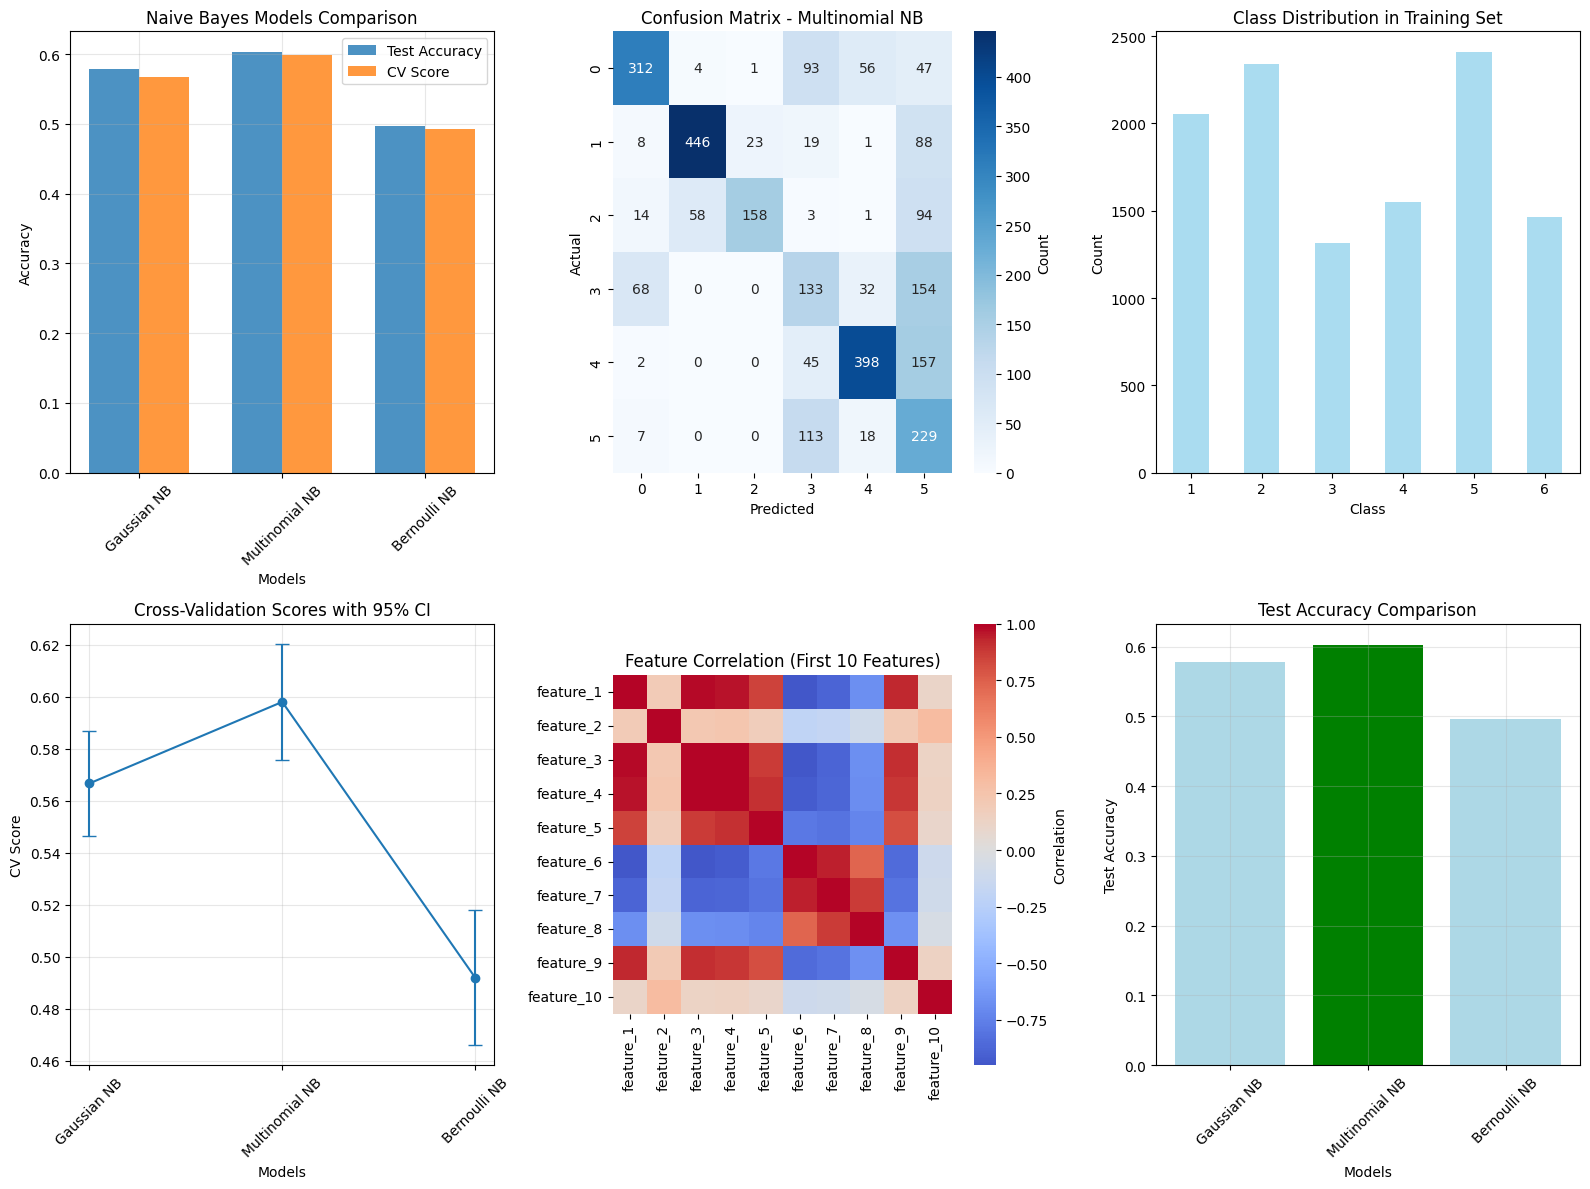

In [13]:
# Visualization of results
plt.figure(figsize=(16, 12))

# Plot 1: Model Comparison
plt.subplot(2, 3, 1)
model_names = list(results.keys())
test_accuracies = [results[name]['test_acc'] for name in model_names]
cv_scores = [results[name]['cv_mean'] for name in model_names]

x = range(len(model_names))
width = 0.35
plt.bar([i - width/2 for i in x], test_accuracies, width, label='Test Accuracy', alpha=0.8)
plt.bar([i + width/2 for i in x], cv_scores, width, label='CV Score', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Models Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Confusion Matrix for Best Model
plt.subplot(2, 3, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 3: Class Distribution
plt.subplot(2, 3, 3)
y_train.value_counts().sort_index().plot(kind='bar', alpha=0.7, color='skyblue')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot 4: CV Scores with Error Bars
plt.subplot(2, 3, 4)
cv_means = [results[name]['cv_mean'] for name in model_names]
cv_stds = [results[name]['cv_std'] for name in model_names]
plt.errorbar(x, cv_means, yerr=[s * 2 for s in cv_stds], fmt='o-', capsize=5)
plt.xlabel('Models')
plt.ylabel('CV Score')
plt.title('Cross-Validation Scores with 95% CI')
plt.xticks(x, model_names, rotation=45)
plt.grid(True, alpha=0.3)

# Plot 5: Feature Correlation Heatmap (sample of features)
plt.subplot(2, 3, 5)
sample_features = X.iloc[:, :10]  # First 10 features for visualization
correlation_matrix = sample_features.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation (First 10 Features)')

# Plot 6: Prediction Confidence Distribution (for Gaussian NB)
plt.subplot(2, 3, 6)
if best_model_name == 'Gaussian NB':
    # Get prediction probabilities
    X_te_best = data_variants[best_model_name][1]
    pred_proba = best_model.predict_proba(X_te_best)
    max_proba = pred_proba.max(axis=1)
    
    plt.hist(max_proba, bins=20, alpha=0.7, color='green', edgecolor='black')
    plt.xlabel('Maximum Prediction Probability')
    plt.ylabel('Frequency')
    plt.title(f'Prediction Confidence - {best_model_name}')
    plt.grid(True, alpha=0.3)
else:
    # For other models, show accuracy comparison
    plt.bar(model_names, test_accuracies, color=['green' if name == best_model_name else 'lightblue' for name in model_names])
    plt.xlabel('Models')
    plt.ylabel('Test Accuracy')
    plt.title('Test Accuracy Comparison')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Save the best Naive Bayes model
print("=== Saving Best Model ===")

# Save the best model
model_filename = f'coal_mine_{best_model_name.lower().replace(" ", "_")}_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Best model ({best_model_name}) saved as '{model_filename}'")

# Save the appropriate scaler
if best_model_name == 'Gaussian NB':
    scaler_filename = 'coal_mine_standard_scaler.pkl'
    joblib.dump(scaler_standard, scaler_filename)
    print(f"Standard scaler saved as '{scaler_filename}'")
elif best_model_name == 'Multinomial NB':
    scaler_filename = 'coal_mine_minmax_scaler.pkl'
    joblib.dump(scaler_minmax, scaler_filename)
    print(f"MinMax scaler saved as '{scaler_filename}'")
elif best_model_name == 'Bernoulli NB':
    joblib.dump(median_values, 'coal_mine_median_values.pkl')
    print("Median values for binarization saved as 'coal_mine_median_values.pkl'")

# Save feature names and model info
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'coal_mine_nb_feature_names.pkl')
print("Feature names saved as 'coal_mine_nb_feature_names.pkl'")

# Save model performance summary
model_summary = {
    'best_model': best_model_name,
    'test_accuracy': best_model_result['test_acc'],
    'cv_score_mean': best_model_result['cv_mean'],
    'cv_score_std': best_model_result['cv_std'],
    'num_features': len(feature_names),
    'num_samples': len(df),
    'num_classes': len(y.unique()),
    'class_distribution': y.value_counts().to_dict()
}

joblib.dump(model_summary, 'coal_mine_nb_model_summary.pkl')
print("Model summary saved as 'coal_mine_nb_model_summary.pkl'")

print(f"\n=== Final Results Summary ===")
print(f"✓ Dataset: Combined {len(csv_files)} CSV files")
print(f"✓ Total samples: {len(df):,}")
print(f"✓ Features: {len(feature_names)}")
print(f"✓ Classes: {len(y.unique())}")
print(f"✓ Best model: {best_model_name}")
print(f"✓ Final test accuracy: {best_model_result['test_acc']:.4f}")
print(f"✓ Cross-validation score: {best_model_result['cv_mean']:.4f} (+/- {best_model_result['cv_std'] * 2:.4f})")
print(f"✓ Models compared: {', '.join(models.keys())}")
print(f"\nModel training completed successfully!")

=== Saving Best Model ===
Best model (Multinomial NB) saved as 'coal_mine_multinomial_nb_model.pkl'
MinMax scaler saved as 'coal_mine_minmax_scaler.pkl'
Feature names saved as 'coal_mine_nb_feature_names.pkl'
Model summary saved as 'coal_mine_nb_model_summary.pkl'

=== Final Results Summary ===


NameError: name 'csv_files' is not defined